In [82]:
#importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
#lendo os CSVs

train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

## Análise exploratória

In [3]:
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [7]:
test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [9]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [4]:
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
train.shape

(76020, 371)

In [30]:
#checkando missing values

flag = 0
for col in train:
    soma = train[col].isna().sum()
    if soma > 0:
        flag += 1
        print(f"train{train[col]} : {soma} missing value(s)")
        
if flag == 0:
  print("0 missing values na base")  

0 missing values na base


In [10]:
#proporção da target

pct = pd.DataFrame(train['TARGET'].value_counts())
pct['Percentage'] = 100*pct['TARGET']/train.shape[0]
pct

,TARGET,Percentage
0,73012,96.043147
1,3008,3.956853


## Feature Selection

In [4]:
def feature_selection(df, threshold):   
    #df, df_id = df.drop([id_column], axis=1)
    
    #removendo features com 0 de variância
    selector = VarianceThreshold()
    selector.fit_transform(df)
    df_var = df.loc[:, selector.get_support()]
    print(f"{len(df.columns) - len(df_var.columns)} colunas removidas com VarianceThreshold(0)")
    
    #removendo features com correlação alta
    corr = df_var.corr()
    columns = np.full((corr.shape[0],), True, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= threshold:
                if columns[j]:
                    columns[j] = False
    selected_columns = df_var.columns[columns]
    df_corr = df_var[selected_columns]    
    print(f"{len(df_var.columns) - len(df_corr.columns)} colunas removidas com correlação > |{threshold}|")
    
    return df_corr

In [5]:
train_sel = feature_selection(train, 0.8)

34 colunas removidas com VarianceThreshold(0)
202 colunas removidas com correlação > |0.8|


In [6]:
train_sel.shape

(76020, 135)

In [71]:
train_sel.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var40_comer_ult1,imp_op_var40_efect_ult1,imp_op_var40_ult1,imp_op_var41_efect_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var12_0,ind_var13_0,ind_var13_largo_0,ind_var13_medio_0,ind_var14_0,ind_var14,ind_var17_0,ind_var18_0,ind_var19,ind_var20_0,ind_var25_cte,ind_var30_0,ind_var31_0,ind_var32_cte,ind_var33_0,ind_var34_0,ind_var37_cte,ind_var39_0,ind_var44_0,num_var4,num_var14_0,num_var17_0,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_var30_0,num_var37_med_ult2,saldo_var1,saldo_var5,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var14,saldo_var17,saldo_var20,saldo_var26,saldo_var30,saldo_var33,saldo_var37,saldo_var44,var36,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_venta_var44_hace3,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1,var21,num_aport_var13_hace3,num_aport_var17_hace3,num_aport_var17_ult1,num_aport_var33_hace3,num_compra_var44_hace3,num_compra_var44_ult1,num_ent_var16_ult1,num_var22_hace2,num_var22_hace3,num_var22_ult1,num_var22_ult3,num_med_var45_ult3,num_meses_var29_ult3,num_op_var40_comer_ult1,num_op_var41_efect_ult1,num_reemb_var17_ult1,num_sal_var16_ult1,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_var45_hace3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var33_hace3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,76020.000000,7.602000e+04,76020.000000,76020.000000,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,76020.000000,76020.000000,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000

In [7]:
train_sel['var3'].describe()

count     76020.000000
mean      -1523.199277
std       39033.462364
min     -999999.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         238.000000
Name: var3, dtype: float64

In [8]:
#Investigando feature com valores discrepantes

train_sel['var3'].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
 6            82
 0            75
 10           72
 11           66
 5            63
 14           61
 15           34
 18           10
 16            9
 23            7
 17            7
 154           6
 20            6
 142           6
 38            6
 25            6
 31            6
 192           5
 138           5
 149           5
 22            5
 91            5
 24            5
 153           5
 30            5
 114           5
 102           4
 158           4
 36            4
 172           4
 209           4
 28            4
 174           4
 147           4
 110           4
 183           4
 48            4
 27            4
 21            4
 103           4
 162           4
 86            4
 46            4
 133           4
 129           4
 163           3
 88            3
 195           3
 100          

In [6]:
#Checando proporção de target da feature 'var3' 

train_sel[train_sel['var3'] == -999999]['TARGET'].value_counts()

0    114
1      2
Name: TARGET, dtype: int64

In [7]:
#Removendo linhas com lixo 

train_sel = train_sel[train_sel['var3'] != -999999]

In [11]:
train_sel['var3'].describe()

count    75904.000000
mean         2.717577
std          9.455147
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max        238.000000
Name: var3, dtype: float64

In [116]:
#checando se não tem outras vaiáveis inteiras com std alto oou médias estranhas

train_sel.select_dtypes(include=['int64']).describe()

,ID,var3,var15,ind_var1_0,ind_var1,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var12_0,ind_var13_0,ind_var13_largo_0,ind_var13_medio_0,ind_var14_0,ind_var14,ind_var17_0,ind_var18_0,ind_var19,ind_var20_0,ind_var25_cte,ind_var30_0,ind_var31_0,ind_var32_cte,ind_var33_0,ind_var34_0,ind_var37_cte,ind_var39_0,ind_var44_0,num_var4,num_var14_0,num_var17_0,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_var30_0,num_var37_med_ult2,var36,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,imp_aport_var33_hace3,imp_aport_var33_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1,var21,num_aport_var13_hace3,num_aport_var17_hace3,num_aport_var17_ult1,num_aport_var33_hace3,num_compra_var44_hace3,num_compra_var44_ult1,num_ent_var16_ult1,num_var22_hace2,num_var22_hace3,num_var22_ult1,num_var22_ult3,num_med_var45_ult3,num_meses_var29_ult3,num_op_var40_comer_ult1,num_op_var41_efect_ult1,num_reemb_var17_ult1,num_sal_var16_ult1,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_var45_hace3,TARGET
count,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,7.590400e+04,7.590400e+04,7.590400e+04,7.590400e+04,7.590400e+04,7.590400e+04,7.590400e+04,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000,75904.000000
mean,75962.296783,2.717577,33.210595,0.011462,0.003768,0.957960,0.664471,0.000105,0.000026,0.032884,0.067625,0.052329,0.010184,0.000026,0.023688,0.005309,0.001805,0.000026,0.004203,0.003636,0.026468,0.995481,0.004282,0.001212,0.000751,0.000026,0.072394,0.881284,0.001884,1.080720,0.072802,0.011897,0.020276,0.001028,0.057112,1.603433,0.094066,2.861707,3.372431,0.263939,40.420940,5.006324e+06,2.634907e+06,1.317454e+05,5.269815e+05,5.269815e+05,6.587268e+05,1.317454e+05,2.990356,0.048219,0.000040,0.002701,0.066479,0.129440,32.551644,0.076004,0.001541,0.003399,0.001067,0.001858,0.007549,0.188211,1.297718,1.184799,0.558982,3.041500,4.028167,0.000105,0.075095,0.720160,0.001186,0.004940,0.392628,0.815886,0.120745,3.896909,0.039603
std,43781.375734,9.455147,12.958189,0.106445,0.061268,0.200682,0.472178,0.010266,0.005133,0.178333,0.251103,0.222692,0.100401,0.005133,0.152076,0.072672,0.042446,0.005133,0.064692,0.060191,0.160522,0.067071,0.065295,0.034794,0.027393,0.005133,0.259141,0.323456,0.043364,0.909444,0.611275,0.362757,0.898303,0.180900,1.828768,7.327299,1.216141,10.890825,1.337596,1.651502,47.356604,2.236936e+08,1.623037e+08,3.629674e+07,7.259205e+07,7.259205e+07,8.115985e+07,3.629674e+07,227.036241,6.027292,0.006287,0.051899,0.249119,0.335688,393.920965,0.552913,0.104999,0.174192,0.069716,0.099187,0.315694,0.995697,3.447270,3.263498,2.098399,6.203015,10.936915,0.013581,2.091002,3.212652,0.098598,0.155067,2.216830,3.559933,1.172794,10.422966,0.195025
min,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

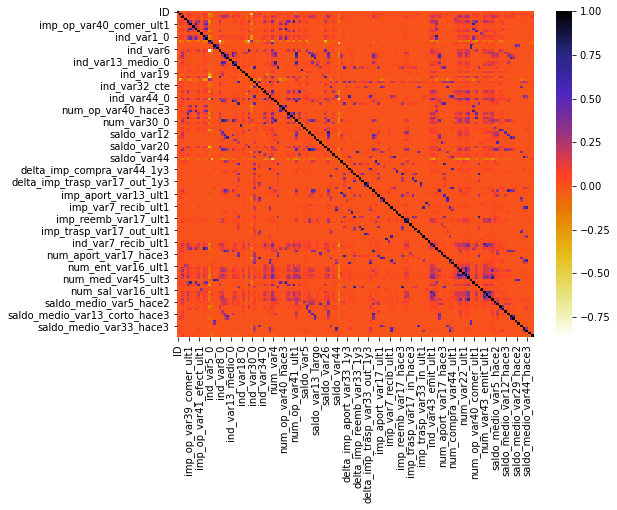

In [10]:
#Using Pearson Correlation
plt.figure(figsize=(8,6))
cor = train_sel.iloc[:,:].corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.CMRmap_r)
plt.show()

In [36]:
#proporção da target

pct = pd.DataFrame(train_sel['TARGET'].value_counts())
pct['Percentage'] = 100*pct['TARGET']/train_sel.shape[0]
pct

,TARGET,Percentage
0,72898,96.039734
1,3006,3.960266


## Aplicando Modelos

In [8]:
#Separando dados e target
X = train_sel.drop(['TARGET', 'ID'],axis=1)
y = train_sel['TARGET'] 
col_names = X.columns
#idx = train_sel['ID']

#Normalizando os dados
XScaled = StandardScaler().fit_transform(X)

### Testando com técnica de oversampling (SMOTE)

In [9]:
#Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(XScaled,
                                                    y.values,
                                                    stratify= y.values,
                                                    test_size=0.3,
                                                    random_state=42)

In [10]:
oversample = SMOTE()
X_sc_over, y_over = oversample.fit_resample(X_train, y_train)

In [45]:
print(X_sc_over.shape)
print(y_over.shape)
print(X_test.shape)
print(y_test.shape)

(102056, 78)
(102056,)
(22772, 78)
(22772,)


### Testando modelos sem outros tratamentos

In [11]:
def evaluation_metrics(test_y, pred_y):
    accuracy = accuracy_score(test_y, pred_y)
    precision = precision_score(test_y, pred_y)
    recall = recall_score(test_y, pred_y)
    f1 = f1_score(test_y, pred_y)
    #auc_score = auc(test_y, pred_y)
    
    return accuracy, precision, recall, f1

In [12]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    random_state=42,
    class_weight='balanced',
    n_jobs = -1)

logi = LogisticRegression(
    penalty='l2', 
    solver='liblinear', 
    max_iter=100, 
    class_weight='balanced')

xgb = XGBClassifier(
    learning_rate=0.05,
    n_estimators=100,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    scale_pos_weight=10)

In [54]:
#avaliando primeiros modelos sem otimização de hiperparâmetros

def testa_modelos(x_sem_over, y_sem_over, x_over, y_over, test_X, test_y):
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))

    for clf, name in [(rf, 'RandomForest'),
                      (logi, 'LogisticRegression')
                      (xgb, 'XGBClassifier')]:
        # sem SMOTE
        clf.fit(x_sem_over, y_sem_over)
        y_pred = clf.predict(X_test)

        plot_precision_recall_curve(clf, test_X, test_y, ax=ax1)
        plot_roc_curve(clf, test_X, test_y, ax=ax2)


        accuracy, precision, recall, f1 = evaluation_metrics(y_test, y_pred)
        print(f"Model: {name} sem SMOTE:\n\taccuracy: {100*accuracy:.2f}% \n\tprecision: {100*precision:.2f}% \n\trecall: {100*recall:.2f}% \n\tf1: {100*f1:.2f}%\n")

        #com SMOTE
        clf.fit(x_over, y_over)
        y_pred = clf.predict(X_test)

        plot_precision_recall_curve(clf, test_X, test_y, ax=ax1)
        plot_roc_curve(clf, test_X, test_y, ax=ax2)

        accuracy, precision, recall, f1 = evaluation_metrics(y_test, y_pred)
        print(f"Model: {name} com SMOTE:\n\taccuracy: {100*accuracy:.2f}% \n\tprecision: {100*precision:.2f}% \n\trecall: {100*recall:.2f}% \n\tf1: {100*f1:.2f}%\n\n")
    
    ax1.legend(loc="right")
    ax1.set_title('Precision-Recall curve')
    
    ax2.legend(loc="right")
    ax2.set_title('ROC AUC curve')
    
    

Model: LogisticRegression sem SMOTE:
	accuracy: 67.48% 
	precision: 8.45% 
	recall: 73.28% 
	f1: 15.15%

Model: LogisticRegression com SMOTE:
	accuracy: 68.80% 
	precision: 8.86% 
	recall: 74.06% 
	f1: 15.83%




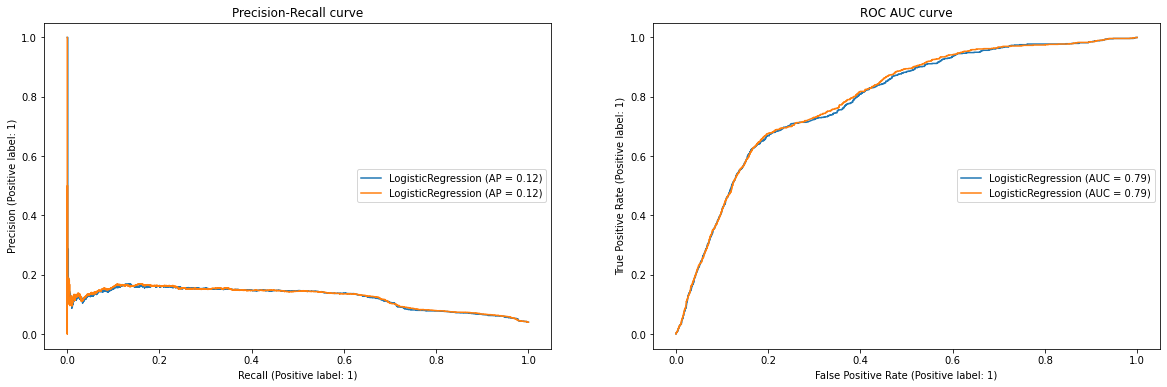

In [52]:
testa_modelos(X_train, y_train, X_sc_over, y_over, X_test, y_test)

### Aplicando PCA

In [59]:
pca = PCA()
pca.fit(XScaled)

PCA()

In [60]:
X_pca = pca.fit_transform(XScaled)

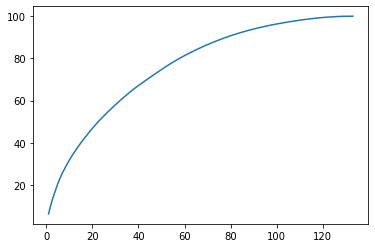

In [14]:
## TO DO ##
## deixar gráfico mais bonito (tentar seaborn)

y = np.cumsum(pca.explained_variance_ratio_ * 100)
x = np.arange(1,len(pca.explained_variance_)+1)
plt.plot(x,y)
plt.show()

In [12]:
np.cumsum(pca.explained_variance_ratio_)

array([0.06313796, 0.10574123, 0.14287124, 0.1751523 , 0.20613947,
       0.23274713, 0.25708622, 0.27802724, 0.29815201, 0.31781546,
       0.33588767, 0.35291541, 0.36907902, 0.38470802, 0.39963809,
       0.41445179, 0.42822574, 0.44186238, 0.4553206 , 0.4684456 ,
       0.48117503, 0.4936051 , 0.50540061, 0.51660163, 0.52773794,
       0.53881194, 0.54959182, 0.56005825, 0.57022406, 0.58034454,
       0.5903637 , 0.60035233, 0.61004871, 0.61938062, 0.62859755,
       0.63774672, 0.64674848, 0.65529424, 0.66357197, 0.67153303,
       0.67946803, 0.68721753, 0.69489611, 0.7025687 , 0.71016297,
       0.71772536, 0.7252749 , 0.7328025 , 0.74026871, 0.74769317,
       0.75503798, 0.76215826, 0.76918742, 0.77601987, 0.78267737,
       0.78921107, 0.79556991, 0.80174997, 0.80779087, 0.81360732,
       0.81934879, 0.82489289, 0.83036179, 0.83578754, 0.84100742,
       0.84615915, 0.8512046 , 0.85623337, 0.861169  , 0.86586657,
       0.87048455, 0.87501531, 0.87941667, 0.88379829, 0.88815

In [61]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

d = np.argmax(cumsum >= 0.9) + 1
d

78

In [68]:
pca = PCA(n_components=d)
pca.fit(XScaled)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

X_pca = pca.fit_transform(XScaled)
pca_df = pd.DataFrame(data = X_pca, columns=labels)
pca_df['TARGET'] = train_sel['TARGET']

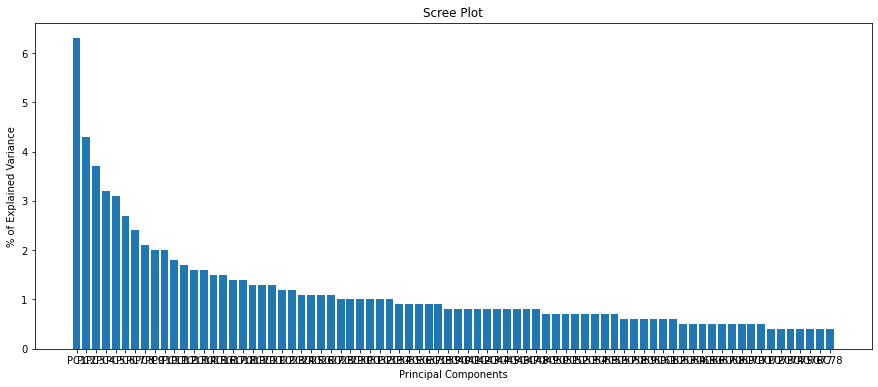

In [35]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('% of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [166]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,TARGET
0,-1.926841,0.008427,0.155431,0.372334,0.350503,-0.054551,0.173061,0.700318,0.270043,0.331350,-0.062997,-0.079409,0.175760,0.493692,-0.199082,-0.024607,-0.389353,0.103584,0.122077,-0.145985,0.049005,-0.395960,-0.113094,-0.257522,-0.145588,0.353798,0.380921,0.613601,-0.012175,0.295238,0.298232,-0.454145,0.060846,0.038202,0.092418,-0.065245,0.030346,-0.016864,-0.088271,0.054553,0.114767,-0.003507,0.007352,-0.028665,-0.098254,0.011875,-0.029392,0.025146,0.096072,-0.307457,-0.067783,0.057402,0.378775,0.429657,0.545933,0.060042,-0.042085,-0.408067,0.365917,-0.183150,-0.080628,-0.071119,-0.132911,-0.079676,-0.177679,0.175746,-0.080188,0.101514,-0.206468,0.137036,-0.061140,-0.180230,-0.050290,0.202486,0.065023,0.063097,0.114435,0.005711,0.0
1,0.361367,3.107509,-0.603083,0.603483,0.684887,0.270763,1.423225,0.114245,-0.050682,-1.088851,-0.364950,-0.441130,0.319686,0.277446,-0.274435,0.091862,-0.230412,0.145417,-0.031402,0.105463,0.178517,-0.534124,-0.085331,0.138630,-0.191386,-0.373920,-0.175506,0.060314,0.023077,0.032302,0.004520,-0.309486,-0.281885,-0.254695,0.281363,-0.023649,-0.016363,0.227788,0.498372,0.118384,0.479312,-0.029991,-0.143971,0.096466,-0.435824,0.433901,-0.020212,0.222425,-0.182248,-0.186090,-0.290484,0.063654,0.439381,0.196004,-0.297191,0.148973,-0.535524,0.027129,-0.619909,0.132054,-0.033997,-0.813117,0.224980,-1.000062,0.136760,-0.090099,0.065505,-0.493213,0.515160,0.746008,-0.413714,0.325736,0.612629,1.509757,-0.835653,1.654230,0.120337,1.410614,0.0
2,-1.611362,-0.126031,0.124274,0.159599,0.140088,-0.131210,-0.000211,-0.008749,-0.023430,-0.058104,-0.043957,-0.049547,0.106414,0.069138,-0.079221,0.046861,-0.154032,-0.020188,-0.189288,0.315452,-0.194881,0.028942,0.035739,-0.114834,0.055153,-0.093378,-0.070416,-0.190169,-0.037408,-0.032184,-0.012913,-0.277887,-0.146501,0.017459,0.061350,-0.019714,0.069647,-0.072822,-0.067757,0.061711,0.014650,-0.086300,-0.025174,0.016650,-0.064911,-0.048879,-0.042175,0.034511,0.059015,-0.168895,0.089183,0.044822,0.197382,0.249005,0.147208,0.191616,0.134249,-0.275129,0.404542,-0.115203,-0.037523,-0.070549,-0.037946,-0.071541,-0.150004,0.162771,0.005520,0.192836,-0.247523,0.052882,0.027660,-0.083568,-0.037500,-0.038393,-0.051067,0.047370,-0.094234,-0.175398,0.0
3,1.202861,-1.389267,-0.279186,-0.783081,-0.834871,0.069237,0.321126,-1.311738,-0.581399,-0.944105,0.038980,0.227761,-0.298147,-0.951745,0.535662,0.194235,1.033872,-0.292616,-0.849475,1.114246,-0.193210,0.591283,0.365230,1.388558,0.365996,0.987412,-1.518169,0.305131,-0.745693,0.448781,0.681580,-0.679984,1.260348,-0.834462,0.134243,-0.333366,0.018101,-0.765803,0.286506,-0.074959,0.032309,-0.150489,-0.262831,0.344156,-0.358014,-0.245029,-0.117150,0.020263,0.433126,-0.125817,0.238454,0.032893,0.265210,-0.436669,-0.146836,-0.087170,-0.572028,0.639799,0.923807,0.045262,-1.985930,-0.346269,0.027440,0.646435,-0.085880,0.975573,0.291942,0.046323,-0.228789,-0.192289,0.019242,0.606239,-0.303793,0.001279,-0.530753,0.008099,-0.254088,-0.091455,0.0
4,4.963737,1.986209,-0.336040,-1.364927,-1.328850,-1.370335,-6.875974,1.542126,1.504252,8.195970,0.710676,-1.755761,1.313287,2.791224,-0.224911,-0.035717,-1.907836,0.497585,-0.513183,1.675335,-0.171544,-2.816406,-0.393578,-0.189944,0.001642,-4.079227,-1.022729,-1.925432,0.194130,-0.542463,1.296189,-0.587307,3.162070,-4.053500,1.364512,-1.506207,1.997561,1.359663,0.036249,0.205321,1.174908,0.463046,-0.579289,0.508555,-1.762107,1.246910,-0.112051,1.187211,-1.519758,1.166842,-0.972288,0.132411,-0.054042,0.098050,0.578622,0.241293,0.060288,0.731649,0.032790,0.016666,-0.422852,-0.854368,0.567415,-0.472861,0.478051,0.34660

In [22]:
## get the name of the top 10 measurements that contribute most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=X.columns)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 features
top_10_features = sorted_loading_scores[:10].index.values
 
print(loading_scores[top_10_features])


## TO DO ##
## colocar em um gráfico

num_var4                   0.246070
num_var22_ult3             0.223694
num_med_var45_ult3         0.208906
num_var22_hace3            0.181262
ind_var43_emit_ult1        0.178865
num_var45_hace3            0.176820
num_var30_0                0.176757
ind_var43_recib_ult1       0.173945
num_op_var41_ult1          0.167444
imp_op_var39_comer_ult1    0.166653
dtype: float64


#### Testando modelos com PCA

In [23]:
#Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_pca,
                                                    y.values,
                                                    stratify= y.values,
                                                    test_size=0.3,
                                                    random_state=42)

Model: RandomForest sem SMOTE:
	accuracy: 80.86% 
	precision: 12.82% 
	recall: 66.08% 
	f1: 21.47%

Model: RandomForest com SMOTE:
	accuracy: 78.35% 
	precision: 11.81% 
	recall: 69.07% 
	f1: 20.17%


Model: LogisticRegression sem SMOTE:
	accuracy: 67.76% 
	precision: 8.52% 
	recall: 73.28% 
	f1: 15.26%

Model: LogisticRegression com SMOTE:
	accuracy: 69.41% 
	precision: 9.03% 
	recall: 74.06% 
	f1: 16.09%




<Figure size 720x1440 with 0 Axes>

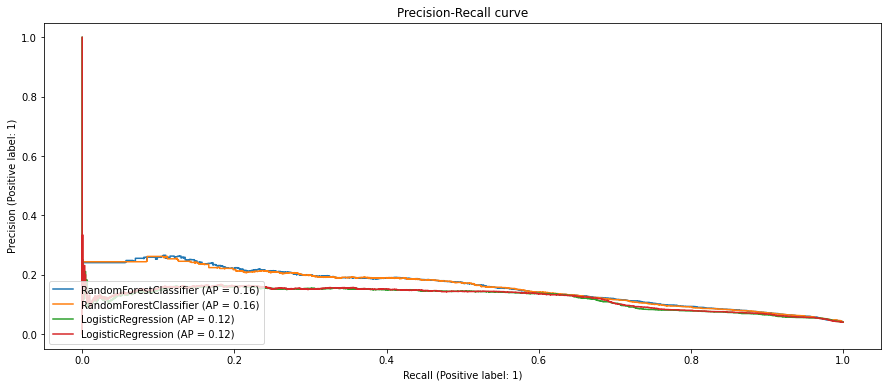

In [55]:
oversample = SMOTE()
X_res, y_res = oversample.fit_resample(X_train, y_train)

testa_modelos(X_train, y_train, X_res, y_res, X_test, y_test)

## Otimizando modelo

In [32]:
#Achando melhores hiperparâmetros com hyperopt SEM SMOTE


#Define Parameter Space for Optimization
space = {
    "n_estimators": hp.choice("n_estimators", [50, 100, 200, 300, 400]),
    "max_depth": hp.quniform("max_depth", 2, 24, 2),
    "max_features": hp.choice("max_features", ['auto', 'sqrt', 'log2']),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
    "min_samples_leaf":hp.choice("min_samples_leaf", [1, 2, 3, 4, 5]),
    "min_samples_split":hp.choice("min_samples_split", [2, 3, 4, 5, 6]),
    "class_weight": hp.choice("class_weight", ['balanced', 'balanced_subsample', None]),
    "bootstrap": hp.choice("bootstrap", [True, False])
}

#Defining a Function to Minimize (Objective Function)
def hyperparameter_tuning(params):
    clf = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
    f1 = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1').mean()
    
    return {"loss": -f1, "status": STATUS_OK}

# Fine Tune the Model
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=10, 
    trials=trials
)

print("Best: {}".format(best))

100%|█████████████████████████████████████████████| 10/10 [32:07<00:00, 192.73s/trial, best loss: -0.24038247054298614]
Best: {'bootstrap': 0, 'class_weight': 0, 'criterion': 0, 'max_depth': 22.0, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 1}


In [173]:
#Modelo escolhido pelo hyperopt

criterion = ["gini", "entropy"][0]
max_depth =  15.0
n_estimators = [100, 200, 300, 400,500,600][1]

clf = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    random_state=42,
    class_weight='balanced',
    n_jobs = -1)

clf.fit(X_train, y_train)
cv = cross_val_score(clf,X_train,y_train, cv = 5 , scoring='f1')

CrossValMean = cv.mean()
print("CrossValMean:", CrossValMean)
CrossValSTD = cv.std()
print("CrossValSTD:", CrossValSTD)

CrossValMean: 0.2340600575561183
CrossValSTD: 0.011331094095708684


In [174]:
y_pred = clf.predict(X_test)

accuracy, precision, recall, f1 = evaluation_metrics(y_test, y_pred)
print(f"Accuracy: {100*accuracy:.2f}% \nPrecision: {100*precision:.2f}% \nRecall: {100*recall:.2f}% \nF1: {100*f1:.2f}%")

Accuracy: 84.60% 
Precision: 14.12% 
Recall: 56.87% 
F1: 22.63%


### Hyperopt com SMOTE

In [30]:
#Achando melhores hiperparâmetros com hyperopt


#Define Parameter Space for Optimization
space = {
    "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500]),
    "max_depth": hp.quniform("max_depth", 2, 24, 2),
    "max_features": hp.choice("max_features", ['auto', 'sqrt', 'log2']),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
    "min_samples_leaf":hp.choice("min_samples_leaf", [1, 2, 3, 4, 5]),
    "min_samples_split":hp.choice("min_samples_split", [2, 3, 4, 5, 6]),
    "class_weight": hp.choice("class_weight", ['balanced', 'balanced_subsample', None]),
    "bootstrap": hp.choice("bootstrap", [True, False])
}

#Defining a Function to Minimize (Objective Function)
def hyperparameter_tuning(params):
    model = RandomForestClassifier(**params, n_jobs=-1)
    
    over = SMOTE()
    
    steps = [('o', over), ('m', model)]
    pipeline = Pipeline(steps=steps)
    
    f1 = cross_val_score(pipeline, X_train, y_train,cv = 5, scoring='f1', error_score='raise').mean()
    
    return {"loss": -f1, "status": STATUS_OK}

# Fine Tune the Model
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=10, 
    trials=trials
)

print("Best: {}".format(best))

100%|████████████████████████████████████████████| 10/10 [1:15:19<00:00, 451.93s/trial, best loss: -0.2111622856689539]
Best: {'bootstrap': 1, 'class_weight': 0, 'criterion': 1, 'max_depth': 14.0, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 0}


In [172]:
#Modelo escolhido pelo hyperopt

clf = RandomForestClassifier(
    n_estimators=[100, 200, 300, 400,500][1],
    max_depth= 28,
    max_features = ['auto', 'sqrt', 'log2'][2],
    criterion = ["gini", "entropy"][1],
    min_samples_leaf = [1, 2, 3, 4, 5][0],
    min_samples_split = [2, 3, 4, 5, 6][1],
    class_weight = ['balanced', 'balanced_subsample', None][1],
    bootstrap = [True, False][1],
    random_state=42,
    n_jobs = -1)

clf.fit(X_res, y_res)
cv = cross_val_score(clf,X_res,y_res, cv = 5 , scoring='f1')

CrossValMean = cv.mean()
print("CrossValMean:", CrossValMean)
CrossValSTD = cv.std()
print("CrossValSTD:", CrossValSTD)

NameError: name 'X_res' is not defined

In [171]:
y_pred = clf.predict(X_test)

accuracy, precision, recall, f1 = evaluation_metrics(y_test, y_pred)
print(f"Accuracy: {100*accuracy:.2f}% \nPrecision: {100*precision:.2f}% \nRecall: {100*recall:.2f}% \nF1: {100*f1:.2f}%")

NameError: name 'clf' is not defined

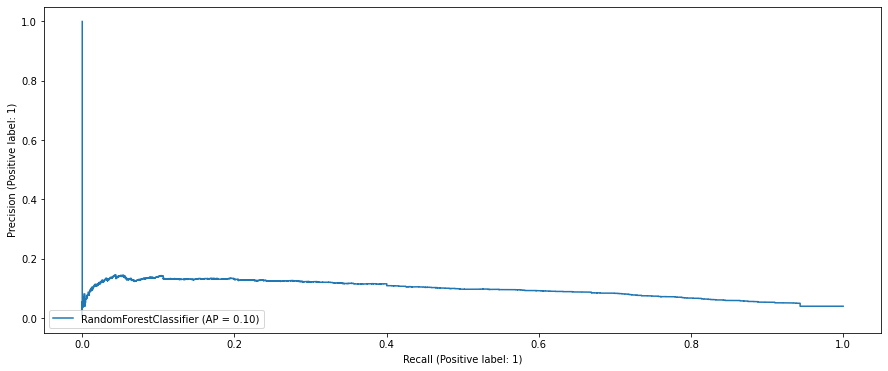

In [58]:
plot_precision_recall_curve(clf, X_test, y_test)

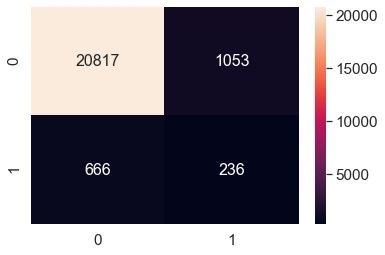

In [244]:
matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(matrix)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True,fmt="d", annot_kws={"size": 16}) # font size
plt.show()

In [189]:
y_pred_prob = clf.predict_proba(X_test)
# Marcar a probabilidade
y_pred_prob = pd.DataFrame({'P_0': y_pred_prob[:, 0], 'P_1': y_pred_prob[:, 1]})
y_pred_prob['P_1'] = y_pred_prob['P_1'].apply(lambda x: x*100)
#y_pred_prob

In [191]:
def resultados_finais(df_real, df_pred):
    tn, fp, fn, tp = confusion_matrix(df_real, df_pred).ravel()
    
    print("============================================")
    print("Perdas : R${} reais".format((-10)*fp))
    print("Ganhos : R${} reais.".format((90)*tp))
    print("Lucro final :  R${} no total".format((90)*tp+(-10)*fp))
    print("Lucro por campanha : R${:.2f}".format(((90)*tp+(-10)*fp)/(tp+fp)))
    print("============================================")


def calculo_lucros(df_real, df_pred):
    tn, fp, fn, tp = confusion_matrix(df_real, df_pred).ravel()
    cf1=(90)*tp+(-10)*fp # lucro total
    cf2=((90)*tp+(-10)*fp)/(tp+fp) #lucro em relação a quantidade de campanhas feitas
    cf3=((90)*tp+(-10)*fp)/len(df_pred) #lucro em relação a base inteira

    return cf1, cf2, cf3

In [187]:
resultados_finais(y_test, y_pred)

Perdas : R$-31190 reais
Ganhos : R$46170 reais.
Lucro final :  R$14980 no total
Lucro por campanha : R$4.12


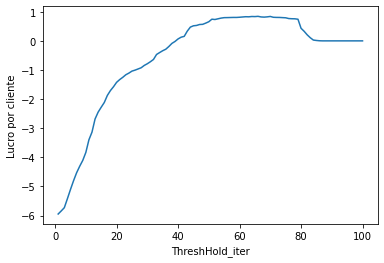

In [211]:
# Avaliar o melhor corte
lucro_pess = []
for thresh in range(1,101):
    #classifica "manualmente"
    y_pred_prob['satisfacao'] = y_pred_prob['P_1'].apply(lambda x: 1 if x >= thresh else 0)
    
    #marca lucro por pessoa(total da base)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_prob['satisfacao']).ravel()
    lucro=((90)*tp+(-10)*fp)/len(y_pred_prob) #lucro em relação a base inteira
    lucro_pess.append(lucro)
        
plt.plot(range(1,101), lucro_pess)
plt.ylabel('Lucro por cliente')
plt.xlabel('ThreshHold_iter')
plt.show()

In [210]:
#Poderia colocar na função de custo do hyperopt

# Marcar o melhor Threshold
percentile_list = pd.DataFrame(np.column_stack([list(range(1,101)), lucro_pess]),
                               columns=['ThreshHold_iter', 'lucro_pess'])
threshold_filter = percentile_list[percentile_list['lucro_pess'] == percentile_list['lucro_pess'].max()].values[0].flat[0]

y_pred_final = pd.DataFrame(y_pred_prob['P_1'].copy())
y_pred_final['satisfacao'] = y_pred_final['P_1'].apply(lambda x: 1 if x >= threshold_filter else 0)

#Resultados
resultados_finais(y_test, y_pred_final['satisfacao'])

#Threshold escolhido
percentile_list[percentile_list['lucro_pess'] == percentile_list['lucro_pess'].max()]

Perdas : R$-19870 reais
Ganhos : R$39060 reais.
Lucro final :  R$19190 no total
Lucro por campanha : R$7.93


,ThreshHold_iter,lucro_pess
65,66.0,0.842702


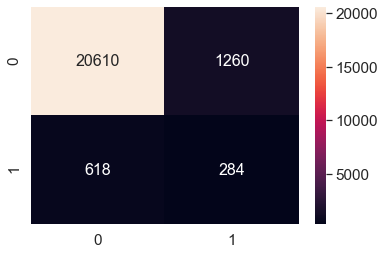

In [252]:
matrix = confusion_matrix(y_test, y_pred_final['satisfacao'])
df_cm = pd.DataFrame(matrix)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True,fmt="d", annot_kws={"size": 16}) # font size
plt.show()

In [25]:
#### Usando Hyperopt com SMOTE no Cross Validation

#Define Parameter Space for Optimization
space = {
    "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500]),
    "max_depth": hp.quniform("max_depth", 2, 30, 2),
    "max_features": hp.choice("max_features", ['auto', 'sqrt', 'log2']),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
    "min_samples_leaf":hp.choice("min_samples_leaf", [1, 2, 3, 4, 5]),
    "min_samples_split":hp.choice("min_samples_split", [2, 3, 4, 5, 6]),
    "class_weight": hp.choice("class_weight", ['balanced', 'balanced_subsample', None]),
    "bootstrap": hp.choice("bootstrap", [True, False])
}


#Defining a Function to Minimize (Objective Function)
def hyperparameter_tuning(params):
    
    model = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
    
    under = RandomUnderSampler(sampling_strategy=0.7)
    over = SMOTE()
    
    steps = [('u', under), ('o', over), ('m', model)]
    pipeline = Pipeline(steps=steps)
    
    f1 = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1').mean()
    
    return {"loss": -f1, "status": STATUS_OK}

# Fine Tune the Model
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=10, 
    trials=trials
)

print("Best: {}".format(best))

100%|██████████████████████████████████████████████| 10/10 [05:01<00:00, 30.18s/trial, best loss: -0.19576935857150932]
Best: {'bootstrap': 0, 'class_weight': 2, 'criterion': 0, 'max_depth': 6.0, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 0}


# Questão 3

In [132]:
y_pca = pca_df['TARGET']
x_pca = pca_df.drop(['TARGET'], axis=1)

In [101]:
def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [97]:
wcss = calculate_wcss(x_pca)

In [130]:
(wcss)

[8651313.085380135,
 8367944.122625333,
 8112743.432511502,
 7953782.349478298,
 7717736.003680148,
 7538238.038916052,
 7314133.932438961,
 7211791.501203534,
 7138821.619330204,
 6818989.1598065775,
 6903325.097784578,
 6642557.927109386,
 6482510.949095156,
 6394877.923387326,
 6341785.433673946,
 6204622.496397897,
 6077362.538263508,
 6068165.436780123,
 5862498.2834970625]

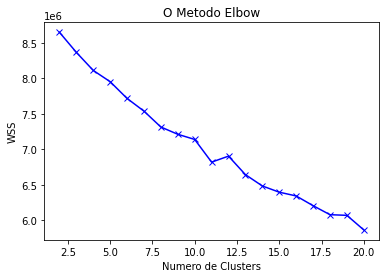

In [167]:
plt.plot(range(2, 21), wcss, 'bx-')
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [103]:
best_n_cluster = optimal_number_of_clusters(wcss)
best_n_cluster

11

In [114]:
x_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78
0,-1.926842,0.008424,0.155433,0.372337,0.350487,-0.054532,0.173014,0.700344,0.270077,0.331218,-0.062951,-0.079517,0.175589,0.493422,-0.198987,-0.024349,-0.389245,0.103474,0.121939,-0.145680,0.049728,-0.395840,-0.113040,-0.257526,-0.144862,0.353658,0.379415,0.613734,-0.012565,0.294718,0.298574,-0.454132,0.061926,0.038233,0.092824,-0.065099,0.031485,-0.014974,-0.087867,0.057868,0.114666,-0.001635,0.004848,-0.028628,-0.096780,0.010529,-0.031505,0.024443,0.093231,-0.310277,-0.069781,0.054965,0.375037,0.432353,0.536008,0.062662,-0.045552,-0.398081,0.375464,-0.176860,-0.048675,-0.062027,-0.113620,-0.101346,-0.175584,0.193545,-0.058251,0.089620,-0.201294,0.114481,-0.061585,-0.176983,-0.069005,0.211255,0.082722,0.106384,0.061041,-0.049913
1,0.361373,3.107531,-0.603076,0.603513,0.684803,0.270716,1.423220,0.114410,-0.050646,-1.088522,-0.363973,-0.441620,0.318521,0.276345,-0.275274,0.091365,-0.231864,0.145407,-0.032573,0.107140,0.182068,-0.540535,-0.087657,0.136930,-0.187969,-0.372369,-0.179821,0.050453,0.018102,0.036872,0.012983,-0.311468,-0.286066,-0.250399,0.279615,-0.031625,-0.020371,0.237194,0.497459,0.118330,0.485834,-0.027238,-0.174484,0.096386,-0.466726,0.441321,-0.030581,0.259067,-0.199818,-0.197232,-0.292469,0.096266,0.425779,0.186427,-0.364612,0.104208,-0.570076,-0.063075,-0.602572,0.093595,0.035821,-0.765199,0.192847,-0.996575,0.188150,-0.057641,-0.009686,-0.424380,0.501151,0.785659,-0.553991,0.284945,0.995967,1.426268,-0.081554,1.727631,-0.466101,0.919413
2,-1.611360,-0.126020,0.124276,0.159590,0.140108,-0.131258,-0.000060,-0.008906,-0.023428,-0.057680,-0.044048,-0.049108,0.106884,0.069944,-0.079573,0.046201,-0.154106,-0.020213,-0.189296,0.314401,-0.195934,0.028965,0.036012,-0.114317,0.054226,-0.093558,-0.066353,-0.191373,-0.037876,-0.029869,-0.012911,-0.279191,-0.149172,0.016758,0.059999,-0.020063,0.068083,-0.079789,-0.068183,0.055638,0.018301,-0.092079,-0.013171,0.017872,-0.060553,-0.044787,-0.039107,0.032671,0.062931,-0.160857,0.096979,0.055014,0.200401,0.247726,0.170054,0.181001,0.140767,-0.281161,0.387736,-0.143576,-0.026033,-0.076565,-0.084325,-0.054874,-0.190040,0.247698,0.021891,0.167436,-0.246025,0.039493,-0.031155,0.017666,-0.050531,0.010161,0.005490,-0.058147,0.011266,0.050189
3,1.202861,-1.389267,-0.279205,-0.783104,-0.834882,0.069255,0.321038,-1.311746,-0.581398,-0.944192,0.038694,0.227608,-0.298039,-0.951672,0.535904,0.194632,1.034682,-0.292730,-0.848820,1.113524,-0.193320,0.591448,0.366215,1.388859,0.366396,0.988125,-1.519009,0.307728,-0.744284,0.447915,0.682231,-0.679384,1.264176,-0.837637,0.131914,-0.328389,0.023795,-0.771237,0.284066,-0.080920,0.030778,-0.149919,-0.274560,0.316131,-0.339204,-0.251298,-0.131295,0.018289,0.431100,-0.123989,0.241669,0.029617,0.263634,-0.442320,-0.147245,-0.068560,-0.551567,0.632254,0.891513,-0.139288,-2.061800,-0.310007,-0.024627,0.628944,-0.074071,0.890153,0.354516,0.004179,-0.186486,-0.140212,0.045528,0.628232,-0.003517,-0.028950,-0.622126,-0.067709,-0.224019,-0.119838
4,4.963730,1.986180,-0.336016,-1.364934,-1.328835,-1.370170,-6.876253,1.542266,1.504148,8.195489,0.710843,-1.755924,1.312741,2.789884,-0.224762,-0.035549,-1.908183,0.498227,-0.512094,1.678314,-0.170707,-2.814166,-0.392453,-0.188302,-0.000654,-4.079539,-1.030427,-1.922692,0.192343,-0.548678,1.291900,-0.583297,3.167376,-4.048528,1.370361,-1.509128,2.002165,1.373339,0.030596,0.253213,1.178311,0.468724,-0.604414,0.433029,-1.833809,1.177903,-0.104704,1.203474,-1.526084,1.166716,-0.992301,0.096727,-0.065365,0.094452,0.597588,0.261740,0.025051,0.755276,0.071067,0.034043,-0.499440,-0.839679,0.660699,-0.437411,0.480931,0.147044,0.298119,-1.1609

For n_clusters = 6 The average silhouette_score is : 0.5347766858229713
For n_clusters = 7 The average silhouette_score is : 0.5336458132953187
For n_clusters = 8 The average silhouette_score is : 0.5692318021951024
For n_clusters = 9 The average silhouette_score is : 0.5701963533119068
For n_clusters = 10 The average silhouette_score is : 0.21227493446214438
For n_clusters = 11 The average silhouette_score is : 0.21633223271566163
For n_clusters = 12 The average silhouette_score is : 0.45724477270078573


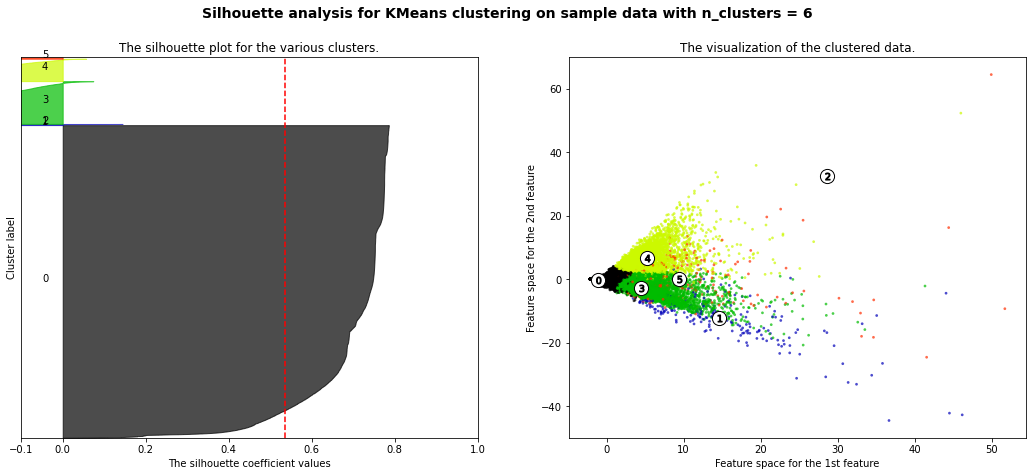

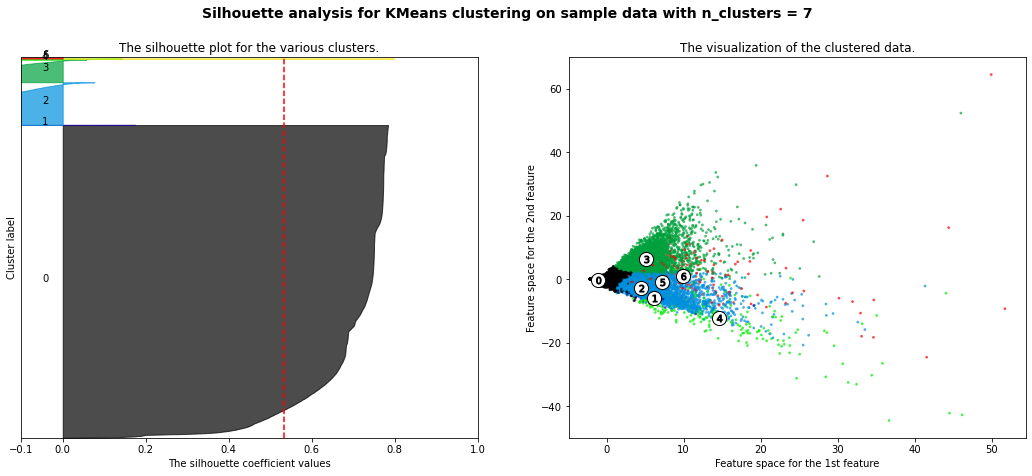

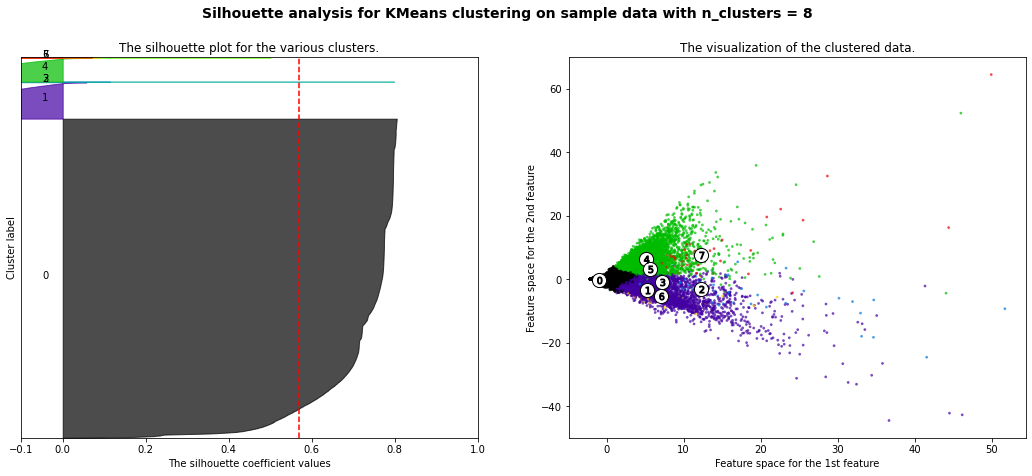

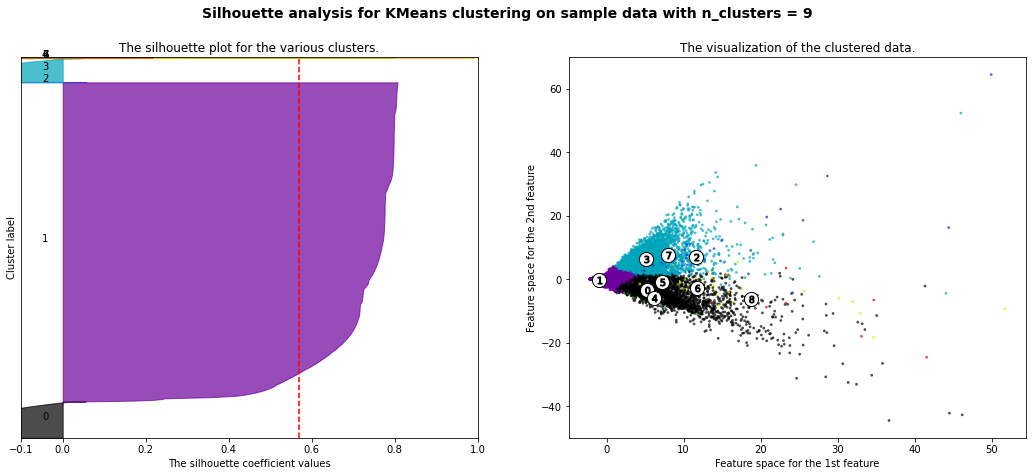

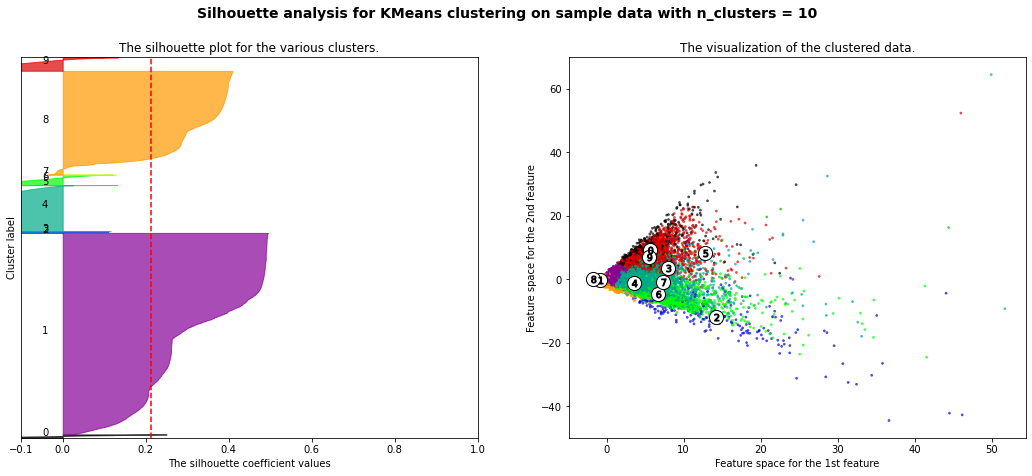

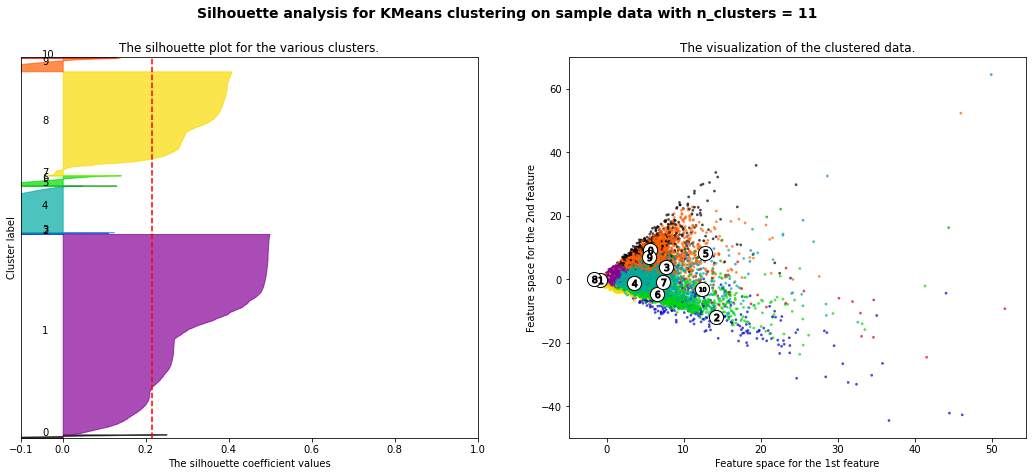

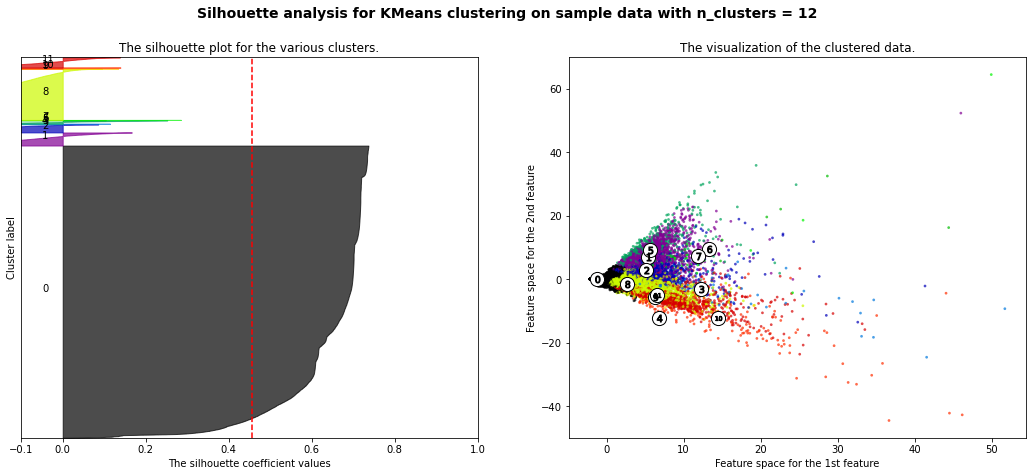

In [121]:
import matplotlib.cm as cm

for n_clusters in range(6, 13):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 42 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(x_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x_pca.iloc[:, 0], x_pca.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

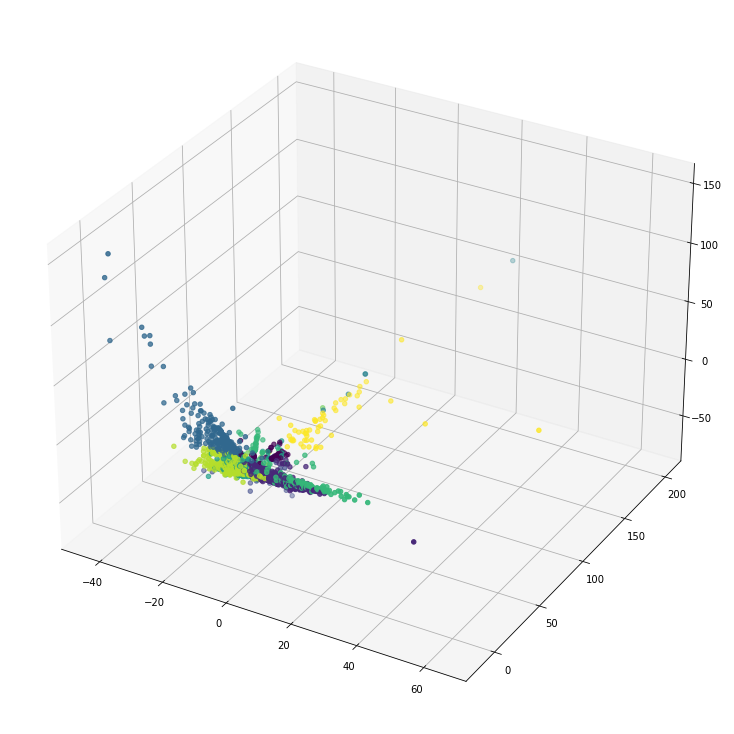

In [133]:
# Rodar Kmeans
df_merge_col_values = pd.DataFrame(x_pca).values
# Initializing KMeans
kmeans = KMeans(n_clusters = 10, n_jobs = -1, max_iter= 400)
# Fitting with inputs
kmeans = kmeans.fit(x_pca)
# Predicting the clusters
k_means_predicted = kmeans.predict(x_pca)
# Getting the cluster centers
C = kmeans.cluster_centers_
# Getting the distance
distance = kmeans.fit_transform(x_pca)
# Getting the labels
labels = kmeans.labels_
# Plotando
fig = plt.figure(figsize=(12,10))
ax = Axes3D(fig)
ax.scatter(df_merge_col_values[:, 1], df_merge_col_values[:, 2], df_merge_col_values[:,3], c=k_means_predicted)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='', s=1000)
plt.show()

In [165]:
# Marcar a previsão =1
k_means_predicted = pd.DataFrame(k_means_predicted)
# Inserir na base full
X_kmeans = x_pca.copy()
X_kmeans['cluster'] = k_means_predicted
X_kmeans['TP'] = y_pca
X_kmeans['qtd'] = np.random.randint(1,100,size=(len(X_kmeans),1))

# Criando as funções agregadas
descriptive = X_kmeans.groupby('cluster', as_index=False).agg({"qtd": np.count_nonzero, "TP":np.sum})
descriptive['FP'] = (descriptive.qtd - descriptive['TP'])
descriptive['perdas'] = (descriptive['FP']*(-10))
descriptive['ganhos'] = (descriptive['TP']*(90))
descriptive['lucro'] = ((descriptive['FP']*(-10)) + (descriptive['TP']*(90)))
descriptive['lucro_por_cliente'] = (descriptive.lucro / descriptive.qtd)
descriptive.sort_values(by=['lucro_por_cliente'],ascending=False,inplace=True)
descriptive

,cluster,qtd,TP,FP,perdas,ganhos,lucro,lucro_por_cliente
7,7,5,1.0,4.0,-40.0,90.0,50.0,10.000000
9,9,54,4.0,50.0,-500.0,360.0,-140.0,-2.592593
2,2,101,5.0,96.0,-960.0,450.0,-510.0,-5.049505
8,8,2057,92.0,1965.0,-19650.0,8280.0,-11370.0,-5.527467
1,1,3844,166.0,3678.0,-36780.0,14940.0,-21840.0,-5.681582
5,5,10111,407.0,9704.0,-97040.0,36630.0,-60410.0,-5.974681
0,0,58841,2297.0,56544.0,-565440.0,206730.0,-358710.0,-6.096259
6,6,685,24.0,661.0,-6610.0,2160.0,-4450.0,-6.496350
3,3,201,6.0,195.0,-1950.0,540.0,-1410.0,-7.014925
4,4,5,0.0,5.0,-50.0,0.0,-50.0,-10.000000


In [166]:
descriptive.head(3)

,cluster,qtd,TP,FP,perdas,ganhos,lucro,lucro_por_cliente
7,7,5,1.0,4.0,-40.0,90.0,50.0,10.000000
9,9,54,4.0,50.0,-500.0,360.0,-140.0,-2.592593
2,2,101,5.0,96.0,-960.0,450.0,-510.0,-5.049505


In [165]:
# Marcar a previsão =1
k_means_predicted = pd.DataFrame(k_means_predicted)
# Inserir na base full
X_kmeans = x_pca.copy()
X_kmeans['cluster'] = k_means_predicted
X_kmeans['TP'] = y_pca
X_kmeans['qtd'] = np.random.randint(1,100,size=(len(X_kmeans),1))

# Criando as funções agregadas
descriptive = X_kmeans.groupby('cluster', as_index=False).agg({"qtd": np.count_nonzero, "TP":np.sum})
descriptive['FP'] = (descriptive.qtd - descriptive['TP'])
descriptive['perdas'] = (descriptive['FP']*(-10))
descriptive['ganhos'] = (descriptive['TP']*(90))
descriptive['lucro'] = ((descriptive['FP']*(-10)) + (descriptive['TP']*(90)))
descriptive['lucro_por_cliente'] = (descriptive.lucro / descriptive.qtd)
descriptive.sort_values(by=['lucro_por_cliente'],ascending=False,inplace=True)
descriptive

,cluster,qtd,TP,FP,perdas,ganhos,lucro,lucro_por_cliente
7,7,5,1.0,4.0,-40.0,90.0,50.0,10.000000
9,9,54,4.0,50.0,-500.0,360.0,-140.0,-2.592593
2,2,101,5.0,96.0,-960.0,450.0,-510.0,-5.049505
8,8,2057,92.0,1965.0,-19650.0,8280.0,-11370.0,-5.527467
1,1,3844,166.0,3678.0,-36780.0,14940.0,-21840.0,-5.681582
5,5,10111,407.0,9704.0,-97040.0,36630.0,-60410.0,-5.974681
0,0,58841,2297.0,56544.0,-565440.0,206730.0,-358710.0,-6.096259
6,6,685,24.0,661.0,-6610.0,2160.0,-4450.0,-6.496350
3,3,201,6.0,195.0,-1950.0,540.0,-1410.0,-7.014925
4,4,5,0.0,5.0,-50.0,0.0,-50.0,-10.000000


In [166]:
descriptive.head(3)

,cluster,qtd,TP,FP,perdas,ganhos,lucro,lucro_por_cliente
7,7,5,1.0,4.0,-40.0,90.0,50.0,10.000000
9,9,54,4.0,50.0,-500.0,360.0,-140.0,-2.592593
2,2,101,5.0,96.0,-960.0,450.0,-510.0,-5.049505


In [142]:
k_means_predicted

,0
0,0
1,0
2,0
3,5
4,1
...,...
75899,0
75900,5
75901,0
75902,0
